# Separating Spam from Ham

Nearly every email user has at some point encountered a "spam" email, which is an unsolicited message often advertising a product, containing links to malware, or attempting to scam the recipient. Roughly 80-90% of more than 100 billion emails sent each day are spam emails, most being sent from botnets of malware-infected computers. The remainder of emails are called "ham" emails.

As a result of the huge number of spam emails being sent across the Internet each day, most email providers offer a spam filter that automatically flags likely spam messages and separates them from the ham. Though these filters use a number of techniques (e.g. looking up the sender in a so-called "Blackhole List" that contains IP addresses of likely spammers), most rely heavily on the analysis of the contents of an email via text analytics.

In this homework problem, we will build and evaluate a spam filter using a publicly available dataset first described in the 2006 conference paper "Spam Filtering with Naive Bayes -- Which Naive Bayes?" by V. Metsis, I. Androutsopoulos, and G. Paliouras. The "ham" messages in this dataset come from the inbox of former Enron Managing Director for Research Vincent Kaminski, one of the inboxes in the Enron Corpus. One source of spam messages in this dataset is the SpamAssassin corpus, which contains hand-labeled spam messages contributed by Internet users. The remaining spam was collected by Project Honey Pot, a project that collects spam messages and identifies spammers by publishing email address that humans would know not to contact but that bots might target with spam. The full dataset we will use was constructed as roughly a 75/25 mix of the ham and spam messages.

The dataset contains just two fields:

- text: The text of the email.
- spam: A binary variable indicating if the email was spam.

## Loading the Dataset

In [1]:
emails = read.csv('./dataset/emails.csv', stringsAsFactors = FALSE, fileEncoding='utf-8')

In [2]:
str(emails)

'data.frame':	5728 obs. of  2 variables:
 $ text: chr  "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market"| __truncated__ "Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmar"| __truncated__ "Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved"| __truncated__ "Subject: 4 color printing special  request additional information now ! click here  click here for a printable "| __truncated__ ...
 $ spam: int  1 1 1 1 1 1 1 1 1 1 ...


In [3]:
table(emails$spam)


   0    1 
4360 1368 

In [4]:
emails[1:3, ]$text

[1] "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction  guaranteed : we provide unlimited amount of changes with no extra fees for you to  be surethat you will love the result of this collaboration . have a look at our  portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _"
[2] "Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no "                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
[3] "Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate .  this offer is being extended to you unconditionally and your credit is in no way a factor .  to take advantage of this limited time opportunity  all we ask is that you visit our website and complete  the 1 minute post approval form  look foward to hearing from you ,  dorcas pittman"

In [5]:
which.max(nchar(emails$text))

[1] 2651

In [6]:
max(nchar(emails$text))

[1] 43952

In [7]:
which.min(nchar(emails$text))

[1] 1992

## Preparing the Corpus

Follow the standard steps to build and pre-process the corpus:

1) Build a new corpus variable called corpus.

2) Using tm_map, convert the text to lowercase.

3) Using tm_map, remove all punctuation from the corpus.

4) Using tm_map, remove all English stopwords from the corpus.

5) Using tm_map, stem the words in the corpus.

6) Build a document term matrix from the corpus, called dtm.

In [8]:
library("tm")
library("SnowballC")

Loading required package: NLP



In [9]:
corpus = VCorpus(VectorSource(emails$text))

In [10]:
corpus = tm_map(corpus, content_transformer(tolower))

In [11]:
corpus = tm_map(corpus, removePunctuation)

In [12]:
corpus = tm_map(corpus, removeWords, stopwords("english"))

In [13]:
corpus = tm_map(corpus, stemDocument)

In [14]:
dtm = DocumentTermMatrix(corpus)

In [15]:
dtm

<<DocumentTermMatrix (documents: 5728, terms: 28687)>>
Non-/sparse entries: 481719/163837417
Sparsity           : 100%
Maximal term length: 24
Weighting          : term frequency (tf)

In [16]:
spdtm = removeSparseTerms(dtm, 0.95)

In [17]:
spdtm

<<DocumentTermMatrix (documents: 5728, terms: 330)>>
Non-/sparse entries: 213551/1676689
Sparsity           : 89%
Maximal term length: 10
Weighting          : term frequency (tf)

In [18]:
emailsSparse = as.data.frame(as.matrix(spdtm))

In [19]:
colnames(emailsSparse) = make.names(colnames(emailsSparse))

In [20]:
sort(colSums(emailsSparse), decreasing=TRUE)

enron        ect    subject       vinc       will        hou        com 
     13388      11427      10202       8532       8252       5577       5443 
     pleas      X2000   kaminski        can      thank    forward       time 
      5113       4967       4801       4257       3730       3161       3145 
     X2001   research     market       work     inform      price       meet 
      3089       2820       2750       2708       2701       2694       2623 
      know      group      manag        may        get       like        use 
      2614       2604       2600       2465       2462       2352       2330 
      need       busi    compani        new       mail       risk      model 
      2328       2313       2290       2281       2269       2267       2199 
    energi      power        one      email     regard       look     messag 
      2179       2117       2108       2066       2045       2003       1983 
       let       year       make    develop       also        day   interest 
      1963       1890       1884       1882       1864       1860       1814 
      week       corp    shirley       call        edu       http    houston 
      1758       1692       1689       1687       1627       1609       1582 
       see     receiv     follow    contact    present    project     option 
      1567       1557       1552       1543       1543       1522       1488 
      want    program       help       list     provid       send      trade 
      1488       1438       1430       1410       1405       1379       1366 
      take       just    request   communic     servic  interview    discuss 
      1361       1354       1344       1343       1337       1333       1326 
       www        now     confer       best     report     includ      think 
      1323       1300       1297       1291       1279       1238       1216 
     order    product       date     number     attach      offer    address 
      1210       1197       1187       1182       1176       1171       1154 
     avail   question      next.       free       sent      visit       well 
      1152       1152       1145       1141       1126       1126       1125 
    system   crenshaw      posit       X713       good       name      state 
      1118       1115       1104       1097       1097       1089       1086 
    financ    schedul        gas      offic    univers       give    stinson 
      1073       1071       1070       1068       1059       1055       1051 
   current       john        fax      chang       X000      phone       last 
      1044       1042       1038       1035       1007       1001        998 
      talk     review    process   industri     credit      month      peopl 
       981        976        975        970        960        958        958 
      data       issu      resum      first       team   opportun       site 
       955        944        933        929        926        918        913 
       two    financi       plan       come     origin      shall      start 
       911        909        904        903        892        884        880 
       ask       find     invest       back        way       much       hope 
       871        867        867        864        864        861        858 
     secur     friday    support     london       dear       base      great 
       857        854        854        843        838        837        837 
   account      today    respons       cost       oper       copi     custom 
       829        828        824        821        820        797        796 
   possibl     access       term   particip     associ      money      addit 
       796        789        786        782        777        776        774 
      file      click     person       mani       book    softwar     requir 
       770        769        767        758        756        739        736 
    within        set    student      futur       valu       rate    complet 
       732        727      

Add a variable called "spam" to emailsSparse containing the email spam labels. You can do this by copying over the "spam" variable from the original data frame (remember how we did this in the Twitter lecture).

In [21]:
emailsSparse$spam = emails$spam

In [22]:
sum(colSums(subset(emailsSparse, spam == 0)) > 5000)

[1] 6

In [23]:
sort(colSums(subset(emailsSparse, spam == 1)), decreasing=TRUE)

subject       will       spam    compani        com       mail       busi 
      1577       1450       1368       1065        999        917        897 
     email        can     inform     receiv        get      money      pleas 
       865        831        818        727        694        662        619 
      free       make       http     market       time        one        now 
       606        603        600        600        593        592        575 
      X000      click        use      order     invest      offer       just 
       560        552        546        541        540        528        524 
     secur     report     websit        new       list      price        may 
       520        507        506        504        503        503        489 
   address       site     messag    softwar       need     provid    account 
       461        455        445        440        438        435        428 
       www    product        day       want       work       look     servic 
       426        421        420        420        415        396        395 
      send   interest       like       year     custom      peopl       best 
       393        385        372        367        363        359        358 
   program      remov     within      onlin       name        see       life 
       358        357        346        345        344        329        320 
    includ        net       take     system      start       home      futur 
       314        305        304        302        300        285        282 
     avail      state        way       know      manag       help   internet 
       280        280        278        269        266        262        262 
      also      today      month      right     follow    contact       made 
       260        251        249        249        244        242        242 
  industri        web     result     number       week        per        don 
       239        238        237        231        231        230        226 
   success    special       good    forward       high       mani    financi 
       226        225        221        209        208        208        207 
     visit      chang    current      first       base       find     effect 
       206        204        203        203        202        202        201 
      rate        buy      trade     expect     person    without     design 
       201        199        199        198        198        198        196 
      form    project       even    complet       much    develop       call 
       196        194        193        192        192        191        190 
     thing      posit     regard       wish      great       cost       link 
       188        187        186        185        182        175        174 
    requir    version     access       give      thank    increas      next. 
       174        174        172        172        172        171        170 
      risk       plan        gas       info       well     credit       term 
       170        166        165        165        164        162        161 
     engin       line   opportun       real      repli       come       sent 
       160        159        158        158        158        155        155 
    return       full     corpor       oper    process    present      power 
       154        152        151        151        149        146        145 
      hour     believ      phone     review        tri     applic      hello 
       144        143        143        142        140        139        139 
     check     immedi       read      offic      think       mean       valu 
       137        136        134        133        132        131        131 
     group      place       date      addit       back       keep       last 
       130        128        127        126        125        125        124 
       two     assist       part      relat    support     import        say 
       124        123    

## Building machine learning models

First, convert the dependent variable to a factor with "```emailsSparse$spam = as.factor(emailsSparse$spam)```".

Next, set the random seed to 123 and use the sample.split function to split emailsSparse 70/30 into a training set called "train" and a testing set called "test". Make sure to perform this step on emailsSparse instead of emails.

Using the training set, train the following three machine learning models. The models should predict the dependent variable "spam", using all other available variables as independent variables. Please be patient, as these models may take a few minutes to train.

1) A logistic regression model called spamLog. You may see a warning message here - we'll discuss this more later.

2) A CART model called spamCART, using the default parameters to train the model (don't worry about adding minbucket or cp). Remember to add the argument method="class" since this is a binary classification problem.

3) A random forest model called spamRF, using the default parameters to train the model (don't worry about specifying ntree or nodesize). Directly before training the random forest model, set the random seed to 123 (even though we've already done this earlier in the problem, it's important to set the seed right before training the model so we all obtain the same results. Keep in mind though that on certain operating systems, your results might still be slightly different).

For each model, obtain the predicted spam probabilities for the training set. Be careful to obtain probabilities instead of predicted classes, because we will be using these values to compute training set AUC values. Recall that you can obtain probabilities for CART models by not passing any type parameter to the predict() function, and you can obtain probabilities from a random forest by adding the argument type="prob". For CART and random forest, you need to select the second column of the output of the predict() function, corresponding to the probability of a message being spam.

You may have noticed that training the logistic regression model yielded the messages "algorithm did not converge" and "fitted probabilities numerically 0 or 1 occurred". Both of these messages often indicate overfitting and the first indicates particularly severe overfitting, often to the point that the training set observations are fit perfectly by the model. Let's investigate the predicted probabilities from the logistic regression model.

In [24]:
emailsSparse$spam = as.factor(emailsSparse$spam)

In [25]:
library("caTools")
library("rpart")
library("rpart.plot")
library("randomForest")

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [26]:
set.seed(123)

In [27]:
split = sample.split(emailsSparse$spam, SplitRatio = 0.7)
train = subset(emailsSparse, split == TRUE)
test = subset(emailsSparse, split == FALSE)

### Logistic Regression

In [28]:
spamLog = glm(spam ~ .,data=train, family='binomial')

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


### CART

In [29]:
spamCART = rpart(spam ~ ., data=train, method='class')

### Random Forest

In [30]:
set.seed(123)
spamRF = randomForest(spam ~ ., data=train)

In [31]:
library("ROCR")

Loading required package: gplots


Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess




In [32]:
predTrainLog = predict(spamLog, type='response')
predTrainCART = predict(spamCART, type='class')
predTrainRF = predict(spamRF, type='prob')[, 2]

In [33]:
sum(predTrainLog < 0.00001)

[1] 3046

In [34]:
sum(predTrainLog > 0.99999)

[1] 954

In [35]:
nrow(train) - 3046 - 954

[1] 10

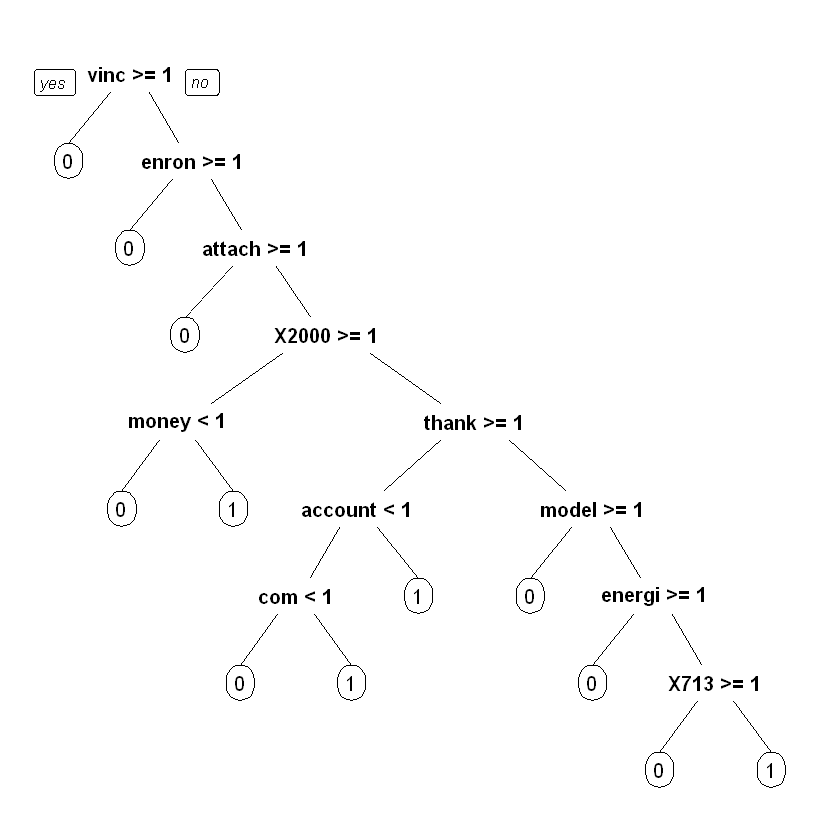

In [36]:
prp(spamCART)

In [37]:
table(train$spam, predTrainLog > 0.5)

   
    FALSE TRUE
  0  3052    0
  1     4  954

In [38]:
log_acc = (3052 + 954) / nrow(train)
log_acc

[1] 0.9990025

In [39]:
predROCR = prediction(predTrainLog, train$spam)
performance(predROCR, "auc")@y.values

[[1]]
[1] 0.9999959

In [40]:
table(predTrainCART, train$spam)

             
predTrainCART    0    1
            0 2885   64
            1  167  894

In [41]:
CART_acc = (2885 + 894) / nrow(train)
CART_acc

[1] 0.942394

In [42]:
predTrainCART = predict(spamCART)[ ,2]
predROCR = prediction(predTrainCART, train$spam)
performance(predROCR, "auc")@y.values

[[1]]
[1] 0.9696044

In [43]:
table(predTrainRF > 0.5, train$spam)

       
           0    1
  FALSE 3015   42
  TRUE    37  916

In [44]:
RF_acc = (3015 + 916) / nrow(train)
RF_acc

[1] 0.9802993

In [45]:
predROCR = prediction(predTrainRF, train$spam)
performance(predROCR, "auc")@y.values

[[1]]
[1] 0.9978155

## Evaluating on the Test Set

In [46]:
predTestLog = predict(spamLog, newdata=test, type='response')
table(predTestLog > 0.5, test$spam)

       
           0    1
  FALSE 1257   34
  TRUE    51  376

In [47]:
log_acc_test = (1257 + 376) / nrow(test)
log_acc_test

[1] 0.9505239

In [48]:
predROCR = prediction(predTestLog, test$spam)
performance(predROCR, "auc")@y.values

[[1]]
[1] 0.9627517

In [49]:
predTestCART = predict(spamCART, newdata=test)[ ,2]
table(predTestCART > 0.5, test$spam)

       
           0    1
  FALSE 1228   24
  TRUE    80  386

In [50]:
CART_acc_test = (1228 + 386) / nrow(test)
CART_acc_test

[1] 0.9394645

In [51]:
predROCR = prediction(predTestCART, test$spam)
performance(predROCR, "auc")@y.values

[[1]]
[1] 0.963176

In [52]:
predTestRF = predict(spamRF, newdata=test, type='prob')[ ,2]
table(predTestRF > 0.5,  test$spam)

       
           0    1
  FALSE 1291   23
  TRUE    17  387

In [53]:
RF_acc_test = (1291 + 387) / nrow(test)
RF_acc_test

[1] 0.9767171

In [54]:
predROCR = prediction(predTestRF, test$spam)
performance(predROCR, "auc")@y.values

[[1]]
[1] 0.9975899

Thus far, we have used a threshold of 0.5 as the cutoff for predicting that an email message is spam, and we have used accuracy as one of our measures of model quality. As we have previously learned, these are good choices when we have no preference for different types of errors (false positives vs. false negatives), but other choices might be better if we assign a higher cost to one type of error.

Consider the case of an email provider using the spam filter we have developed. The email provider moves all of the emails flagged as spam to a separate "Junk Email" folder, meaning those emails are not displayed in the main inbox. The emails not flagged as spam by the algorithm are displayed in the inbox. Many of this provider's email users never check the spam folder, so they will never see emails delivered there.

While we have thus far mostly dealt with frequencies of specific words in our analysis, we can extract other information from text. The last two sections of this problem will deal with two other types of information we can extract.

First, we will use the number of words in the each email as an independent variable. We can use the original document term matrix called dtm for this task. The document term matrix has documents (in this case, emails) as its rows, terms (in this case word stems) as its columns, and frequencies as its values. As a result, the sum of all the elements in a row of the document term matrix is equal to the number of terms present in the document corresponding to the row. Obtain the word counts for each email with the command:
```R
wordCount = rowSums(as.matrix(dtm))
```
IMPORTANT NOTE: If you received an error message when running the command above, it might be because your computer ran out of memory when trying to convert dtm to a matrix. If this happened to you, try running the following lines of code instead to create wordCount (if you didn't get an error, you don't need to run these lines). This code is a little more cryptic, but is more memory efficient.
```R
library(slam)

wordCount = rollup(dtm, 2, FUN=sum)$v
```
When you have successfully created wordCount, answer the following question.

In [55]:
wordCount = rowSums(as.matrix(dtm))

In [58]:
wordCount2 = rowSums(as.matrix(spdtm))

In [59]:
wordCount

[1]  120   64   41   52   20   42  813   41   46   41   79   41   76  732
  [15]   57   91   21   59    8  222   32   61   75   25   32   98   86   43
  [29]   45   41   11  276   62  123  204  127   24   54   21   80   49   35
  [43]  818   25   34  107   23  195   25 1754   67  823   63   21   33  281
  [57]   60   51   36   29  428  501   16   41  132   71  100   62   54   27
  [71]   12   85   59   48  117   32  305  132   54   73   43   40   22  390
  [85]   33   33  138   40  970   40  108   53   93  270   54   38   24   78
  [99]   74   41   43   85  275   33   60   39   74   21   63  127  123   23
 [113]   25   40   90    6  244   60   70   21   52   85    9   41   97   43
 [127] 1758   52   60  203   19   56   52   42   29   85   59   62   73   16
 [141]   16   16   45   49   61   95   60   67    8   47  156 2155  175   41
 [155]   21   50   53   38   52  378  120   64  120   50   41   37  118   54
 [169]   73 1287   27  135   53   35   42  128  270  110   36  424   74  180
 [183]   22   28   33  606   55   56   93   32   32   84  663   54  126  121
 [197]   41  193    7  179   29   19   54  116   12   51  107  119  202  811
 [211]   24   54   49  632  100   39    8  102   20   16   23   46   26   27
 [225]   66   87   28  104  226   53   20   32  144   72   36   55   59   62
 [239]   37  107  448  122  120   23   96   83   95   62   51   50   49   31
 [253]   27   33  232   72   54   52    9  239  394  104   59   45    9   60
 [267]  163   60   30  258    9  105  184   17   76  163  101   50   51  176
 [281]   19  156   55  115   24   54   23   74  260   87   35   76   55   95
 [295]  490   44   33   27   60  239  182  182   52  120   86   33  124   49
 [309]   60   33   43   80   86   51   52  295   54  223   52   53   31   94
 [323]   51  183   22   55   41  109   25   47   20   41  108   23   50   55
 [337]  130   21  119   16   71   68   41   60  132   95  157  128   16   64
 [351]   30   54   26   42   60   54  166   23   87   24  106   53   24   24
 [365]   21   33   22   36   26   67  275   17   72  255   33   49   52   72
 [379]   66   95  192   70   53  115   16   10  120  325  124  577   38   16
 [393]  157   43  365   85   68   54   77  326   27  158    8  229  391   16
 [407]   17  135   13   38   50   33   37   16   28  106   25    8  203   20
 [421]   88   22  463  139   24   41   31  110   65   41   62  154   51   37
 [435]   96  230  107   42   62   52  229   57   23   25   51   58   84   98
 [449]  107   38   55   61   41   43   85   58   34   24   38   73   44 1566
 [463]  155   95   38   20   53   12   55   84  148   26   43   95  407  157
 [477]   85  203  110   46   44  121   84   35  109   78   81   39  257  900
 [491]   70   52  303  327   42  108   74   51   95  114   67   71   22   32
 [505]   43  246   63   33  105   87   45  499   51  319   71   71   26   18
 [519]  146   50  163   95   54   27  134   62   45   45   70   41   20  405
 [533]  143  263   95  310 2374   43   26  136   72   62   53  144  184   41
 [547]   62   16   41  197   89   95   22  148  389   99   60   64  265  519
 [561]   63   27  332  258  144  160   50   63    2   32   80   49   43  164
 [575]   29   43  198   27  124   26   15   52   63   22   50  166   56  166
 [589]  100   15   64   83   95   43   29   40   62   72   50   25  192   41
 [603]   68  233   47  123   13   67   26   20   64   37   52  158   56   75
 [617]   40  145   41  100   86   37   80   44   54   71  241   64  176   28
 [631]   95    6  160  120   19   33   10  120   95   41  130   14   41 1234
 [645]   52   25   64  107   73   33   44   76   34   33   24   53   61   29
 [659]  170   95   48  567   16   30   62  326  592   20   25  202  104   45
 [673]   72  492   72   44   59   51   53   52   49  100 1231   50  253   16
 [687]   41   37   41  102   18   71   50  104   87   34   50   49   54   46
 [701]  612  337  284   39    9  110  297   54   26   64  121   39  101   50
 [715]   77   53   95  809  102  185  306   60   49   64   35  575  220  165

In [60]:
wordCount2

1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
  53   10   22   26    8    8  309   23   17   24   35   21   40  246   21   50 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   7   23    5  106   11   33   35    7   10   36   43    5    7   24    4  106 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
  24   23   74   41   10   24    3   21   28   15  306    8   12   48    8   61 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
  11  505   35  310   16    7   12  107   23   35   22    7  200  178   13   22 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
  51   30   33   36   26    2    5   39   23   13   53   15  107   54   24   39 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
  27   11   14  121   11   12   61   14  289   18   42   29   45  110   32    7 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
   5   25   37   21   15   49  121   16   22   18   21    6   32   70   65    7 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
  13   19   48    1   81   24   33   10   23   45    2   12   40    8  556   12 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
  25   64    5   12   29   16   12   49   23   31   28    4    7    6    7   24 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
  39   13   26   38    1    7   71  849   71   23   10   25   13   17    9  144 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
  50   30   51   27   24   15   51   21   47  534   10   43   28   20   33   73 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
 140   58   11  156   21   84   10   12   12  227   28   24   26   12   12   49 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
 227   23   71   53   24   51    4   42   16    5   24   75    7   11   39   51 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
  91  318   12   26   24  242   38   20    4   58   13   13   11   29   10    5 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
  20   58    9   43   92   23    6   17   61   36   20   16   37   36   18   56 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
 178   53   54    9   57   39   11   35   22   19   26    8    7   12   94   37 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
  25   24    5  128  172   52   22    8    3   24   58   23   10  124    3   62 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
  46    8   21   62   74   26   12   70    9   63   26   55    7   25   11   42 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
 101   60   21   35   30   12  203    6   11    7   38  128   90   53   10   53 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
  21   11   73   24   25    7   10   25   23   22   25   99   26   78   20   27 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
  11   33    7  110    9   37    6   63   12    9   10    7   39    1   22   31 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
  45    7   51   14   25   25   27   33   42   13   75   56   13   10   13   24 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
  10   17   24   23   46   10   60   10   48   33   12   11   14   11    6    8 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
  10   23  151    4   44  161   12   25   22   21   22   12  106   29   29   75 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
   4    3   33  118   74  206   20

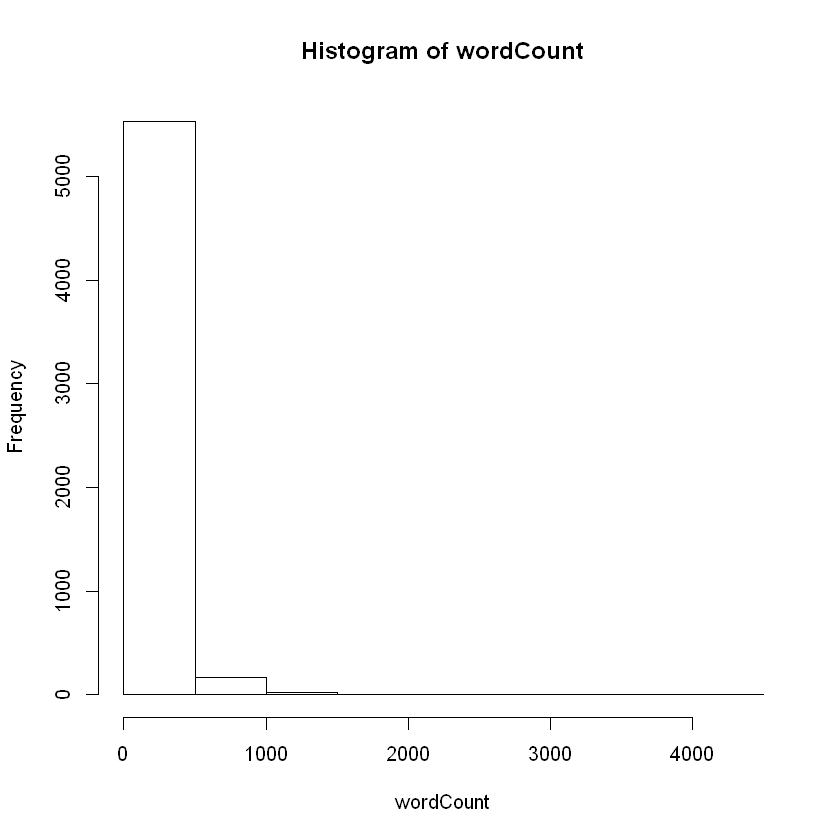

In [63]:
hist(wordCount)

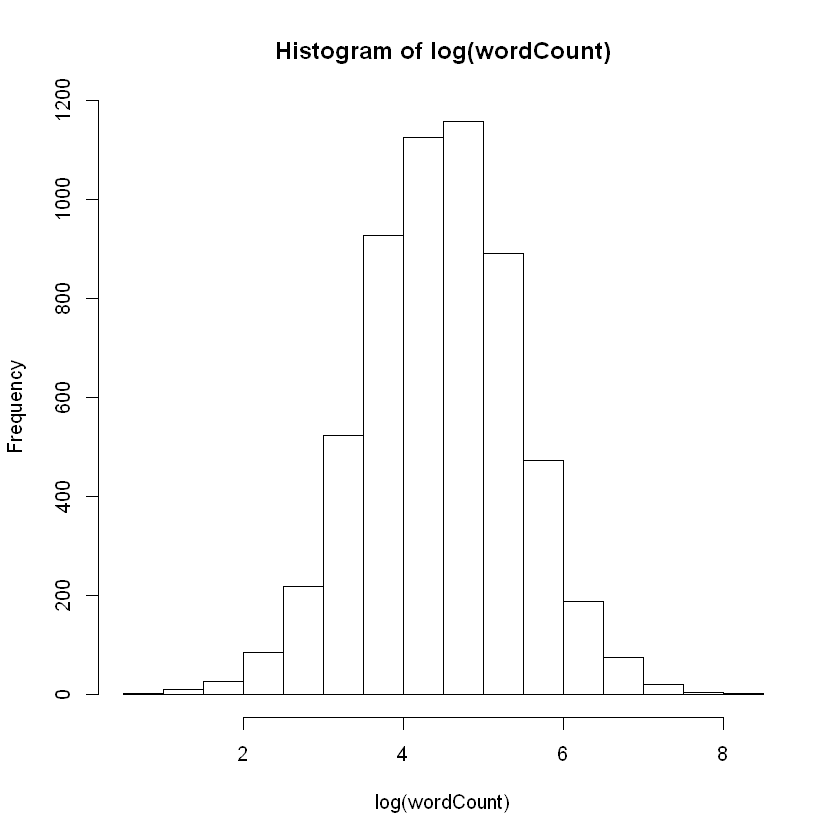

In [64]:
hist(log(wordCount))

In [65]:
emailsSparse$logWordCount = log(wordCount)

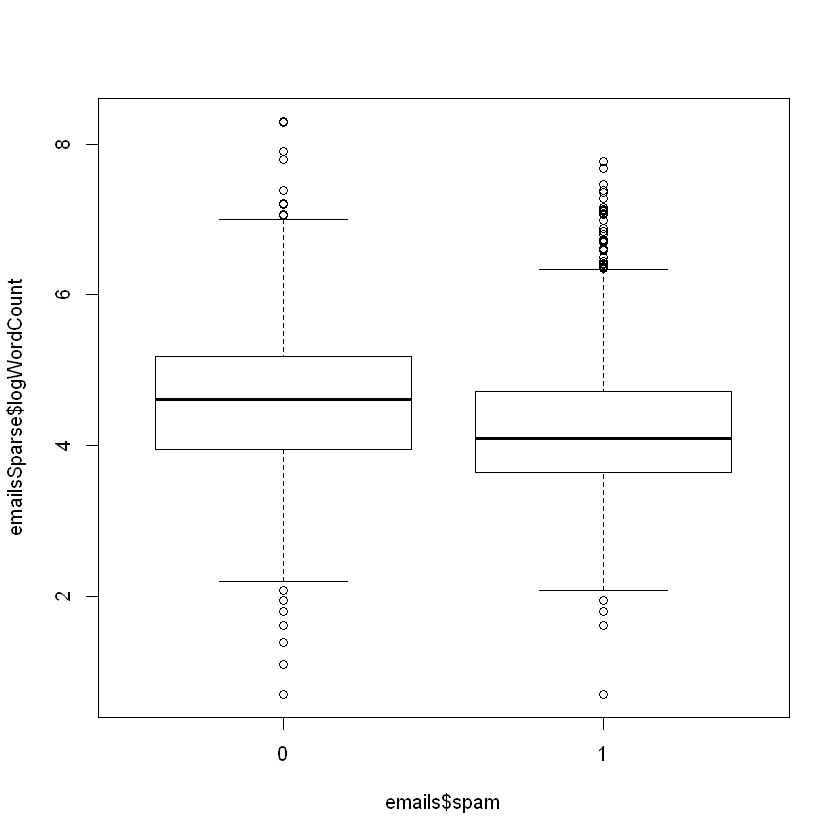

In [70]:
boxplot(emailsSparse$logWordCount ~ emails$spam)

Because logWordCount differs between spam and ham messages, we hypothesize that it might be useful in predicting whether an email is spam. Take the following steps:

1) Use the same sample.split output you obtained earlier (do not re-run sample.split) to split emailsSparse into a training and testing set, which you should call train2 and test2.

2) Use train2 to train a CART tree with the default parameters, saving the model to the variable spam2CART.

3) Use train2 to train a random forest with the default parameters, saving the model to the variable spam2RF. Again, set the random seed to 123 directly before training spam2RF.

In [71]:
train2 = subset(emailsSparse, split == TRUE)
test2 = subset(emailsSparse, split == FALSE)

In [72]:
spam2CART = rpart(spam ~ ., data=train2, method='class')

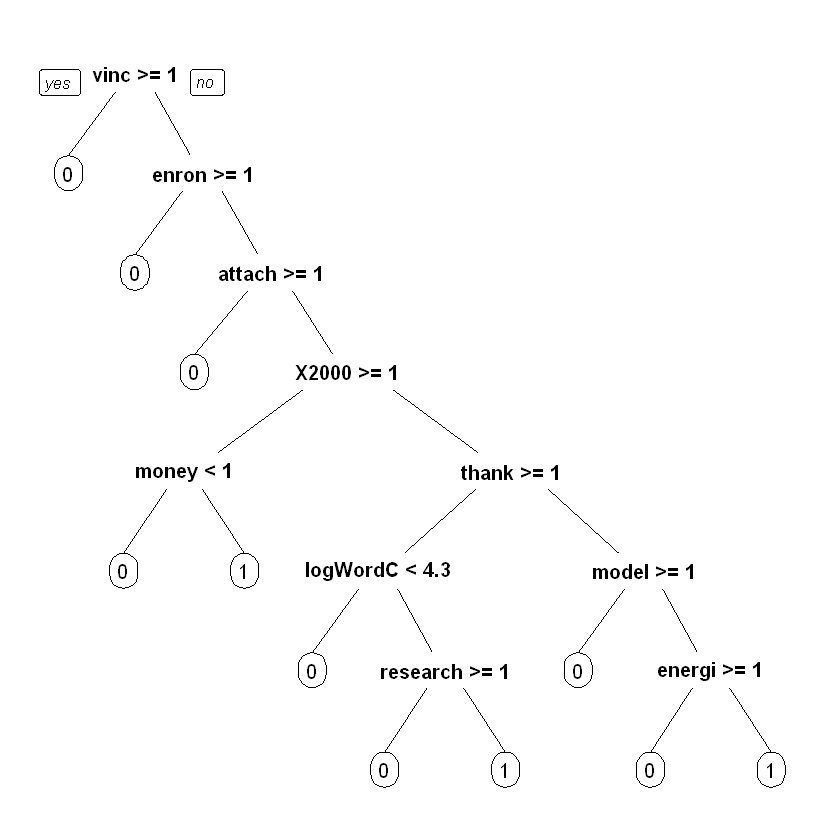

In [73]:
prp(spam2CART)

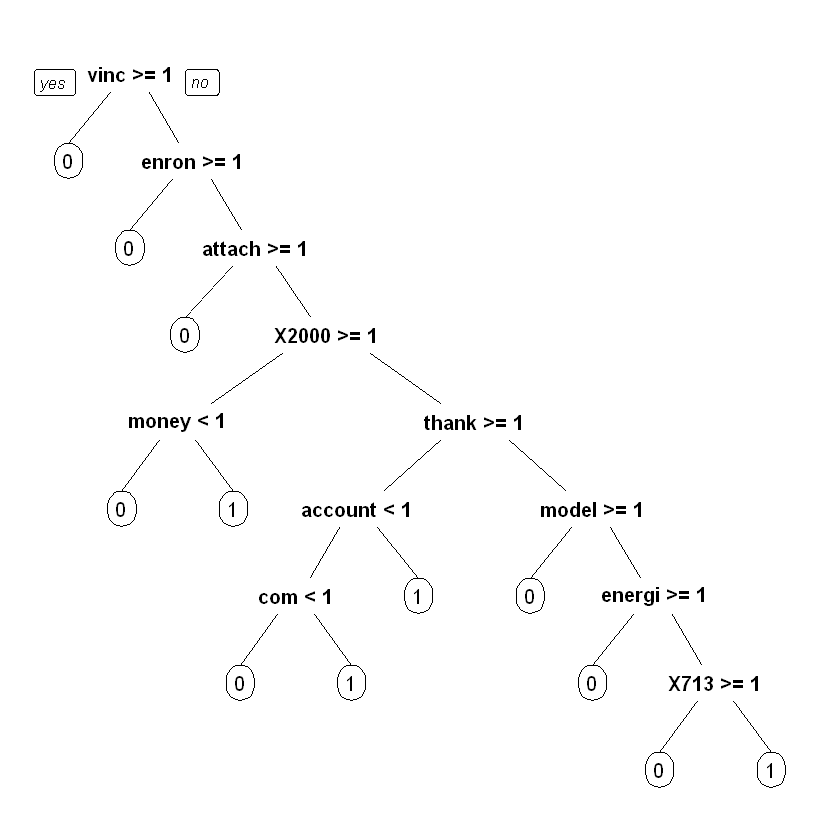

In [74]:
prp(spamCART)

In [80]:
predTestCART2 = predict(spam2CART, newdata=test2)[ ,2]

In [83]:
table(predTestCART2 > 0.5, test2$spam)

       
           0    1
  FALSE 1214   26
  TRUE    94  384

In [84]:
CART_acc = (1214 + 384) / nrow(test2)
CART_acc

[1] 0.9301513

In [85]:
predTestCARTROCR = prediction(predTestCART2, test2$spam)

In [86]:
performance(predTestCARTROCR, "auc")@y.values

[[1]]
[1] 0.9582438

In [98]:
set.seed(123)
spam2RF = randomForest(spam ~ ., data=train2)

In [99]:
predTestRF2 = predict(spam2RF, newdata=test2, type='prob')[ ,2]

In [100]:
table(predTestRF2 > 0.5, test2$spam)

       
           0    1
  FALSE 1298   29
  TRUE    10  381

In [101]:
RF_acc = (1298 + 381) / nrow(test2)
RF_acc

[1] 0.9772992

In [102]:
predTestRFROCR = prediction(predTestRF2, test2$spam)
performance(predTestRFROCR, "auc")@y.values

[[1]]
[1] 0.9979162